# Level 2 Task : 80 CEREALS


**About the Dataset**

    Name: Name of cereal
    mfr: Manufacturer of cereal
       A = American Home Food Products;
       G = General Mills
       K = Kelloggs
       N = Nabisco
       P = Post
       Q = Quaker Oats
       R = Ralston Purina
    type:
       cold
       hot
     calories: calories per serving
     protein: grams of protein
     fat: grams of fat
     sodium: milligrams of sodium
     fiber: grams of dietary fiber
     carbo: grams of complex carbohydrates
     sugars: grams of sugars
     potass: milligrams of potassium
     vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
     shelf: display shelf (1, 2, or 3, counting from the floor)
     weight: weight in ounces of one serving
     cups: number of cups in one serving
     rating: a rating of the cereals

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

**1. Import csv file and get basic information regarding the dataset**

In [2]:
df=pd.read_csv("cereal.csv")#import csv files into a dataframe

In [3]:
df.info()#information regarding the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [4]:
df.shape

(77, 16)

In [5]:
df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [6]:
df.head()#first 5 rows

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [7]:
df.describe()#Summary statistics of numerical columns.

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [8]:
null_values = df.isnull().sum() # Check whether any null values are there in the dataset
null_values

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [9]:
duplicates = df.duplicated().sum()# check for duplications in the dataset
duplicates 

0

In [10]:
manufacturer_dict = {
  'A': 'American Home Food Products;',
  'G': 'General Mills',
  'K': 'Kelloggs',
  'N': 'Nabisco',
  'P': 'Post',
  'Q': 'Quaker Oats',
  'R': 'Ralston Purina ',
}
df['mfr'] = df['mfr'].map(manufacturer_dict)

In [11]:
types_dict={
    'H':'Hot',
    'C':'Cold'
}
df['type'] = df['type'].map(types_dict)

**2. Box plots for nutritional content**

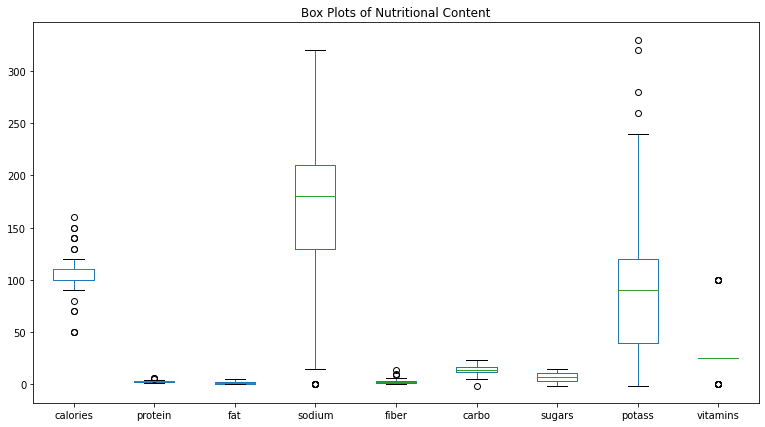

In [12]:
nutritional_columns = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass','vitamins']
df[nutritional_columns].plot(kind='box',vert=True, figsize=(13, 7))
plt.title('Box Plots of Nutritional Content')
plt.show()

# There are some outliers found in the dataset, which are seen as individual points outside the boxplot. 

**3. Remove Outliers using IQR method**

In [13]:
#Q1 = df[nutritional_columns].quantile(0.25)
#Q1

In [14]:
#Q3 = df[nutritional_columns].quantile(0.75)
#Q3

In [15]:
#IQR = Q3 - Q1
#IQR  # Interquartile Range

In [16]:
#df_no_outliers = df[~((df[nutritional_columns] < (Q1 - 1.5 * IQR)) | (df[nutritional_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
#print("DataFrame without outliers:")
#df=df_no_outliers
#df

**3. Heatmap - Correlation **

This shows the relationship between the nutirents. 

In [17]:
correlation_matrix = df.corr() #correlation Matrix
correlation_matrix

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


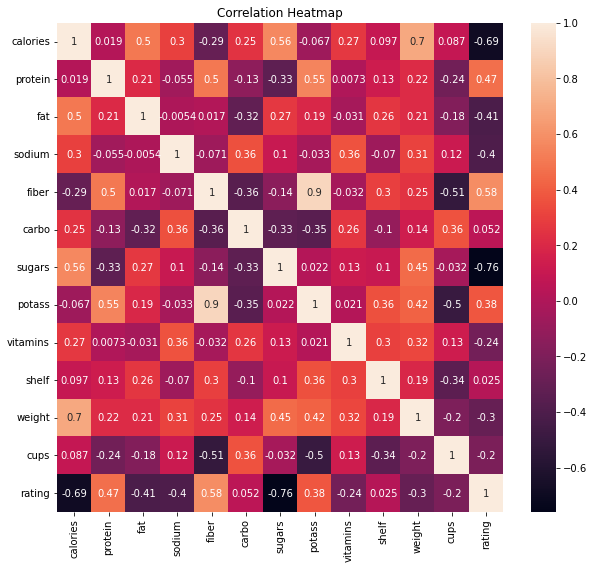

In [18]:
fig, ax = plt.subplots(figsize=(10, 9)) 
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

**4. Which Manufacturer has highest Production?**

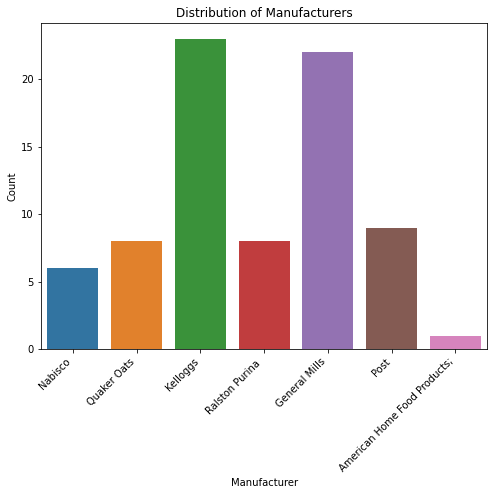

In [19]:
fig, ax = plt.subplots(figsize=(8, 6)) # set canvas

ax=sns.countplot(x='mfr',data=df,) 
plt.title('Distribution of Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Kellogs produces highest products as per the dataset, followed by General Mills. American Home Food Products has less production.

**5. Which Cereal Type has highest production?**

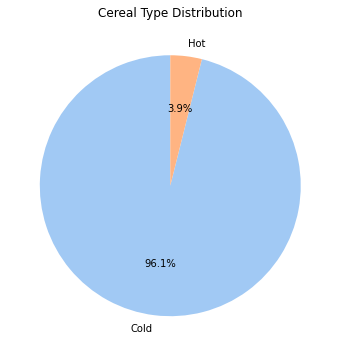

In [20]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Cereal Type Distribution')
plt.show()
# Cold Cereals has maximum productions.

**6. Best and Worst Cereals**

In [21]:
Highest_rated_cereals = df.nlargest(5, 'rating')
print("Highest-rated cereals:")
Highest_rated_cereals[['name', 'rating']]

# The cereal with highest rating - All-Bran with Extra Fiber

Highest-rated cereals:


,name,rating
3,All-Bran with Extra Fiber,93.704912
64,Shredded Wheat 'n'Bran,74.472949
65,Shredded Wheat spoon size,72.801787
0,100% Bran,68.402973
63,Shredded Wheat,68.235885


In [22]:
Lowest_rated_cereals = df.nsmallest(5, 'rating')
print("Lowest-rated cereals:")
Lowest_rated_cereals[['name', 'rating']]

# The cereal with Lowest rating - Cap'n'Crunch

Lowest-rated cereals:


,name,rating
10,Cap'n'Crunch,18.042851
12,Cinnamon Toast Crunch,19.823573
35,Honey Graham Ohs,21.871292
18,Count Chocula,22.396513
14,Cocoa Puffs,22.736446


**7. Distribution of Nutritional contents across each manufacturers - Violin Plot**

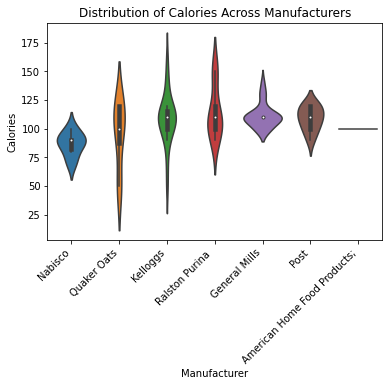

In [23]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='mfr', y='calories', data=df)
plt.title('Distribution of Calories Across Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Calories')
plt.xticks(rotation=45, ha='right')
plt.show()


The above violin plot indicates that Quaker Oats has more products around 120 range, General Mills has more products around 110 range,Nabisco has more products around 90-100 range and so on.

The similar plot can be done for other nutrients also

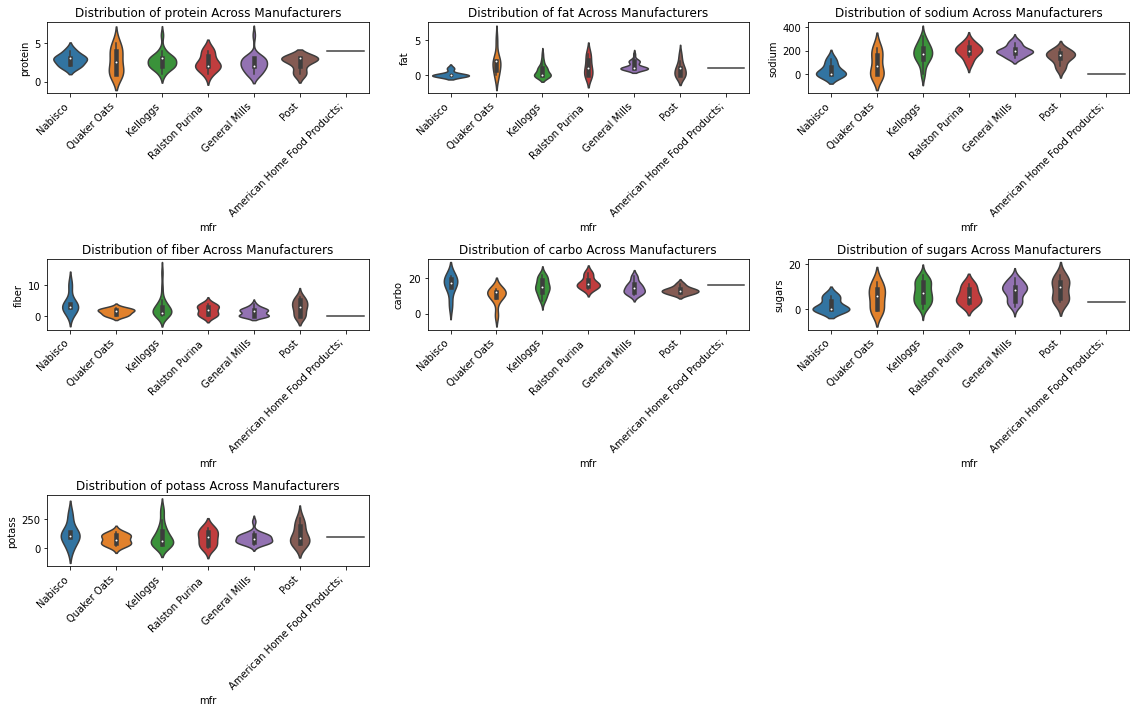

In [24]:
NC =['protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass']
plt.figure(figsize=(16, 10))
for i, column in enumerate(NC, start=1):
    plt.subplot(3, 3, i)
    sns.violinplot(x='mfr', y=column, data=df)
    plt.title(f'Distribution of {column} Across Manufacturers')
    plt.xticks(rotation=45, ha='right')
    
plt.tight_layout()
plt.show()

**8. How ratings differs between different nutrients?**

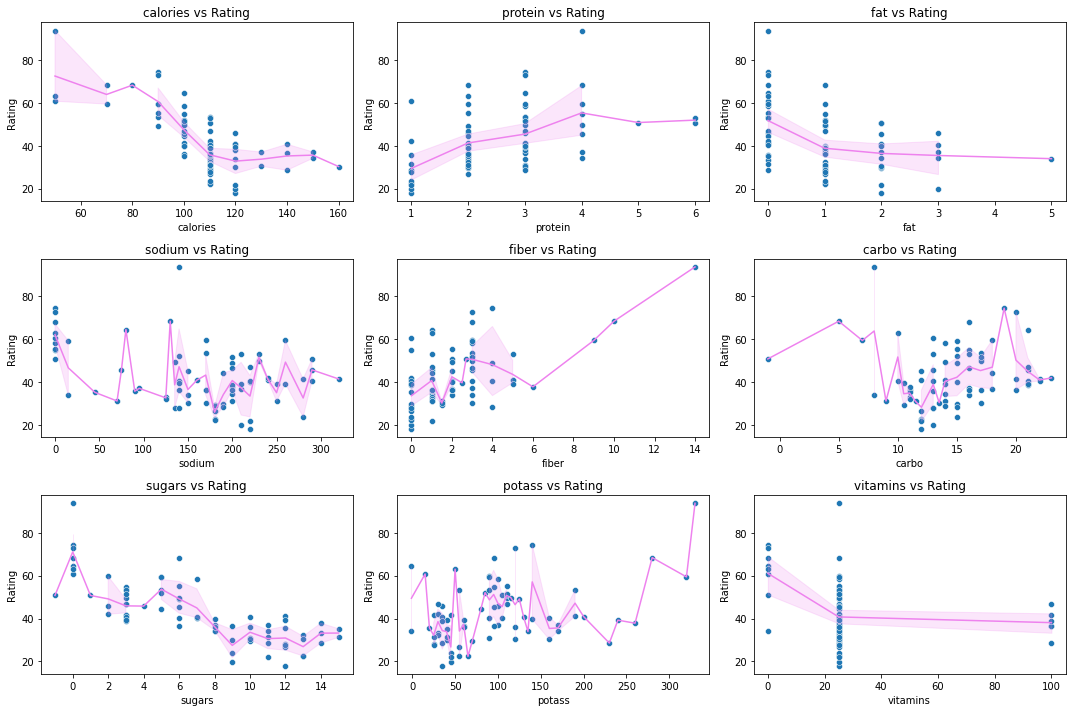

In [25]:
plt.figure(figsize=(15, 10))
for i, nutrient in enumerate(nutritional_columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=nutrient, y='rating', data=df)
    sns.lineplot(x=nutrient, y='rating', data=df, color="violet")
    plt.title(f'{nutrient} vs Rating')
    plt.xlabel(nutrient)
    plt.ylabel('Rating')

plt.tight_layout()
plt.show()

**9. Top 3 Cereals with highest Nutrient Contents**

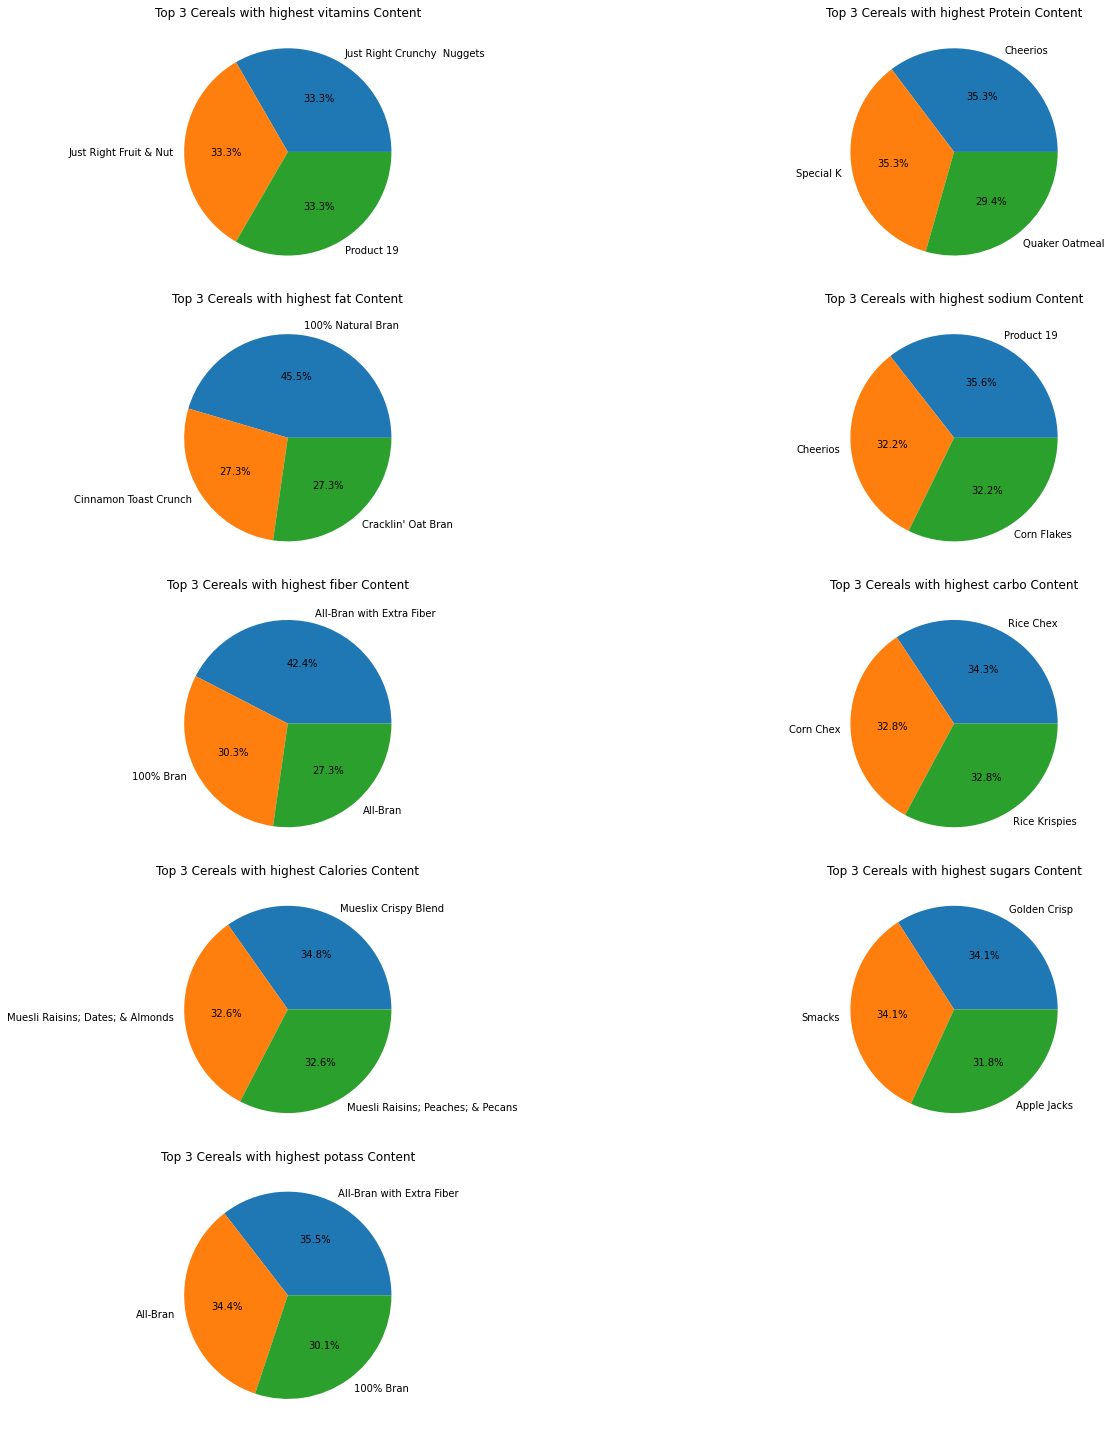

In [49]:
plt.figure(figsize=(20, 20))

# Subplot for 'vitamin'
top_3_vitamin_cereals = df.nlargest(3, 'vitamins')
plt.subplot(5, 2, 1)
plt.pie(top_3_vitamin_cereals['vitamins'], labels=top_3_vitamin_cereals['name'], autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Top 3 Cereals with highest vitamins Content')

# Subplot for 'protein'
plt.subplot(5, 2, 2)
top_3_protein_cereals = df.nlargest(3, 'protein')
plt.pie(top_3_protein_cereals['protein'], labels=top_3_protein_cereals['name'], autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Top 3 Cereals with highest Protein Content')

# Subplot for 'fat'
plt.subplot(5, 2, 3)
top_3_calories_cereals = df.nlargest(3, 'fat')
plt.pie(top_3_calories_cereals['fat'], labels=top_3_calories_cereals['name'], autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Top 3 Cereals with highest fat Content')

# Subplot for 'sodium'
plt.subplot(5, 2, 4)
top_3_calories_cereals = df.nlargest(3, 'sodium')
plt.pie(top_3_calories_cereals['sodium'], labels=top_3_calories_cereals['name'], autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Top 3 Cereals with highest sodium Content')

# Subplot for 'fiber'
plt.subplot(5, 2, 5)
top_3_calories_cereals = df.nlargest(3, 'fiber')
plt.pie(top_3_calories_cereals['fiber'], labels=top_3_calories_cereals['name'], autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Top 3 Cereals with highest fiber Content')

# Subplot for 'carbo'
plt.subplot(5, 2, 6)
top_3_calories_cereals = df.nlargest(3, 'carbo')
plt.pie(top_3_calories_cereals['carbo'], labels=top_3_calories_cereals['name'], autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Top 3 Cereals with highest carbo Content')

# Subplot for 'calories'
plt.subplot(5, 2, 7)
top_3_calories_cereals = df.nlargest(3, 'calories')
plt.pie(top_3_calories_cereals['calories'], labels=top_3_calories_cereals['name'], autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Top 3 Cereals with highest Calories Content')

# Subplot for 'sugars'
plt.subplot(5, 2, 8)
top_3_calories_cereals = df.nlargest(3, 'sugars')
plt.pie(top_3_calories_cereals['sugars'], labels=top_3_calories_cereals['name'], autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Top 3 Cereals with highest sugars Content')

# Subplot for 'potass'
plt.subplot(5, 2, 9)
top_3_calories_cereals = df.nlargest(3, 'potass')
plt.pie(top_3_calories_cereals['potass'], labels=top_3_calories_cereals['name'], autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Top 3 Cereals with highest potass Content')

plt.tight_layout()
plt.show()
